In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [293]:
aerogel_bonding_df = pd.read_csv('aerogel_bonding.csv') #later replace it with github URL

In [294]:
aerogel_bonding_df.head() #printing the first 5 rows

,HolidaysTaken,PercentageOfCompletedTasks,CurrentJobDuration,RecentHolidaysTaken,RequestedProcessAmount,JobStatus,BondingRiskRating,TotalMaterialProcessed,ByproductRation,working_skills,...,TotalMaterialToProcess,WorkHistoryDuration,ApplicantAge,PriorExecutionDefaults,DifferentTasksCompleted,TotalChurnRisk,OtherCompaniesMaterialProcessed,BondingPeriod,trustability,MonthlyExecutions
0,4.0,NaN,6.0,1.0,51172.0,Employed,46.0,300388.0,0.273137,1.244120,...,14193.0,3.0,67.0,0.0,NaN,NaN,NaN,24.0,3.144274,440.0
1,1.0,0.323046,4.0,0.0,11246.0,Employed,54.0,299914.0,0.450387,2.228183,...,85355.0,28.0,52.0,NaN,0.0,0.232582,214559.0,36.0,3.704809,NaN
2,5.0,0.491574,3.0,1.0,14075.0,Employed,42.4,74687.0,0.325027,2.699264,...,14006.0,NaN,45.0,0.0,0.0,0.240812,60681.0,60.0,2.427195,171.0
3,4.0,0.108916,3.0,1.0,18957.0,Employed,40.8,47866.0,NaN,0.445854,...,13240.0,16.0,42.0,0.0,4.0,0.231520,34626.0,84.0,1.156431,212.0
4,NaN,0.174628,1.0,2.0,17902.0,Employed,51.0,18181.0,0.388317,1.940075,...,44217.0,28.0,50.0,0.0,0.0,0.214425,4812.0,48.0,3.185402,323.0


In [295]:
print("Rows:",aerogel_bonding_df.shape[0]) #number of rows

Rows: 20000


In [296]:
print(aerogel_bonding_df.dtypes) #identifying the datatypes of each column 

HolidaysTaken                      float64
PercentageOfCompletedTasks         float64
CurrentJobDuration                 float64
RecentHolidaysTaken                float64
RequestedProcessAmount             float64
JobStatus                           object
BondingRiskRating                  float64
TotalMaterialProcessed             float64
ByproductRation                    float64
working_skills                     float64
CivilStatus                         object
dependability                      float64
MistakesLastYear                   float64
HighestEducationAttained            object
BondingSuccessful                  float64
ChurnRisk                          float64
ProcessedKilograms                 float64
SkillRating                        float64
ProcessingTimestamp                 object
WorkExperience                     float64
HistoricalBehavior                 float64
TotalMaterialToProcess             float64
WorkHistoryDuration                float64
ApplicantAg

# Checking data integrity

In [297]:
# Count NaN (not a number/missing) values in the dataset
nan_count = aerogel_bonding_df.isna().sum() #counts the NaN values(1); false (0) otherwise

# Display the count of NaN values for each column
print("NaN count in each column:")
print(nan_count)

NaN count in each column:
HolidaysTaken                      1905
PercentageOfCompletedTasks         2045
CurrentJobDuration                 2048
RecentHolidaysTaken                1969
RequestedProcessAmount             2075
JobStatus                          2018
BondingRiskRating                  2050
TotalMaterialProcessed             2043
ByproductRation                    1972
working_skills                     1966
CivilStatus                        1954
dependability                      1949
MistakesLastYear                   1987
HighestEducationAttained           2063
BondingSuccessful                  2003
ChurnRisk                          2072
ProcessedKilograms                 1954
SkillRating                        1967
ProcessingTimestamp                2023
WorkExperience                     1931
HistoricalBehavior                 2009
TotalMaterialToProcess             1955
WorkHistoryDuration                2002
ApplicantAge                       2068
PriorExecution

<Axes: >

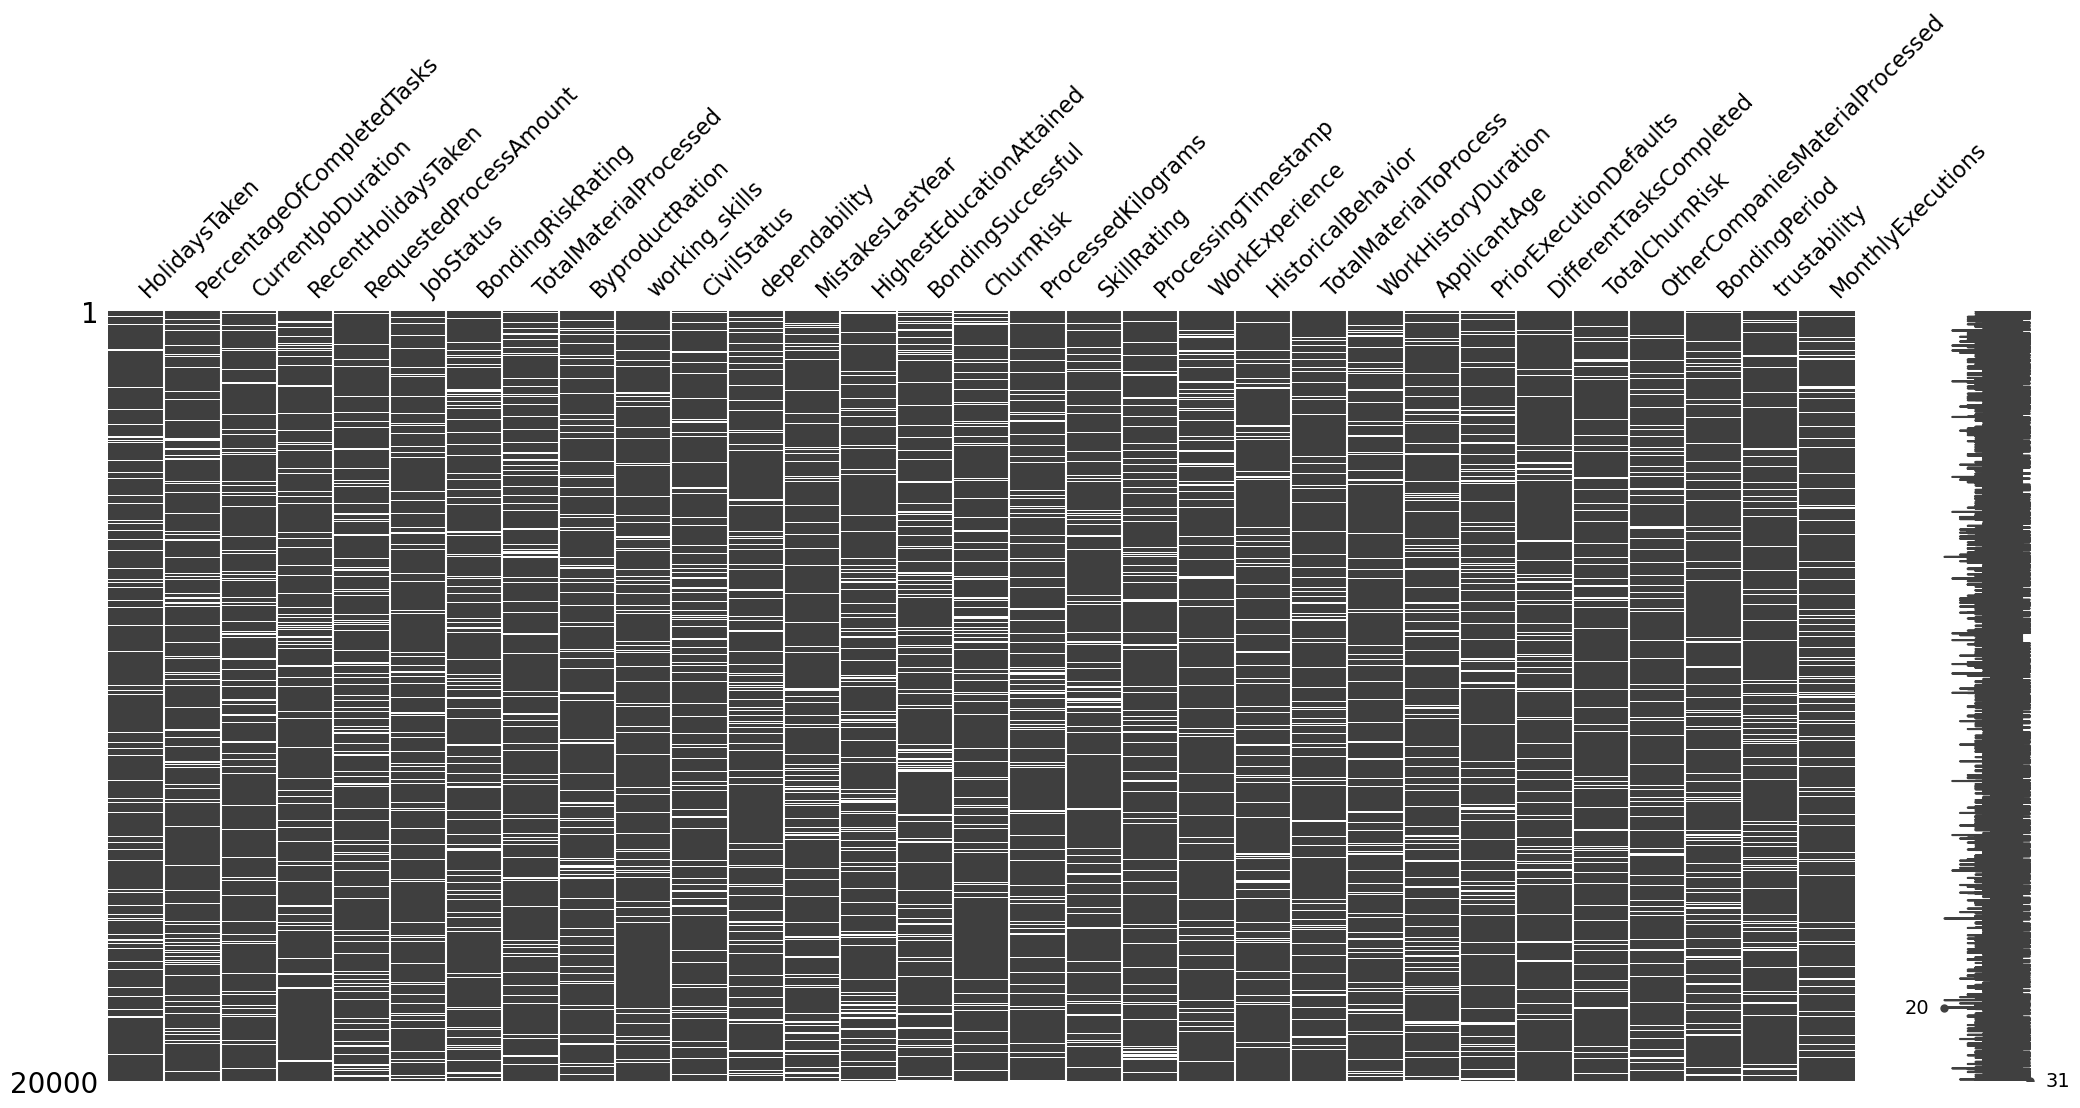

In [298]:
msno.matrix(aerogel_bonding_df)

We can see here that the proportion of missing values for each column is approximately the same:

<Axes: >

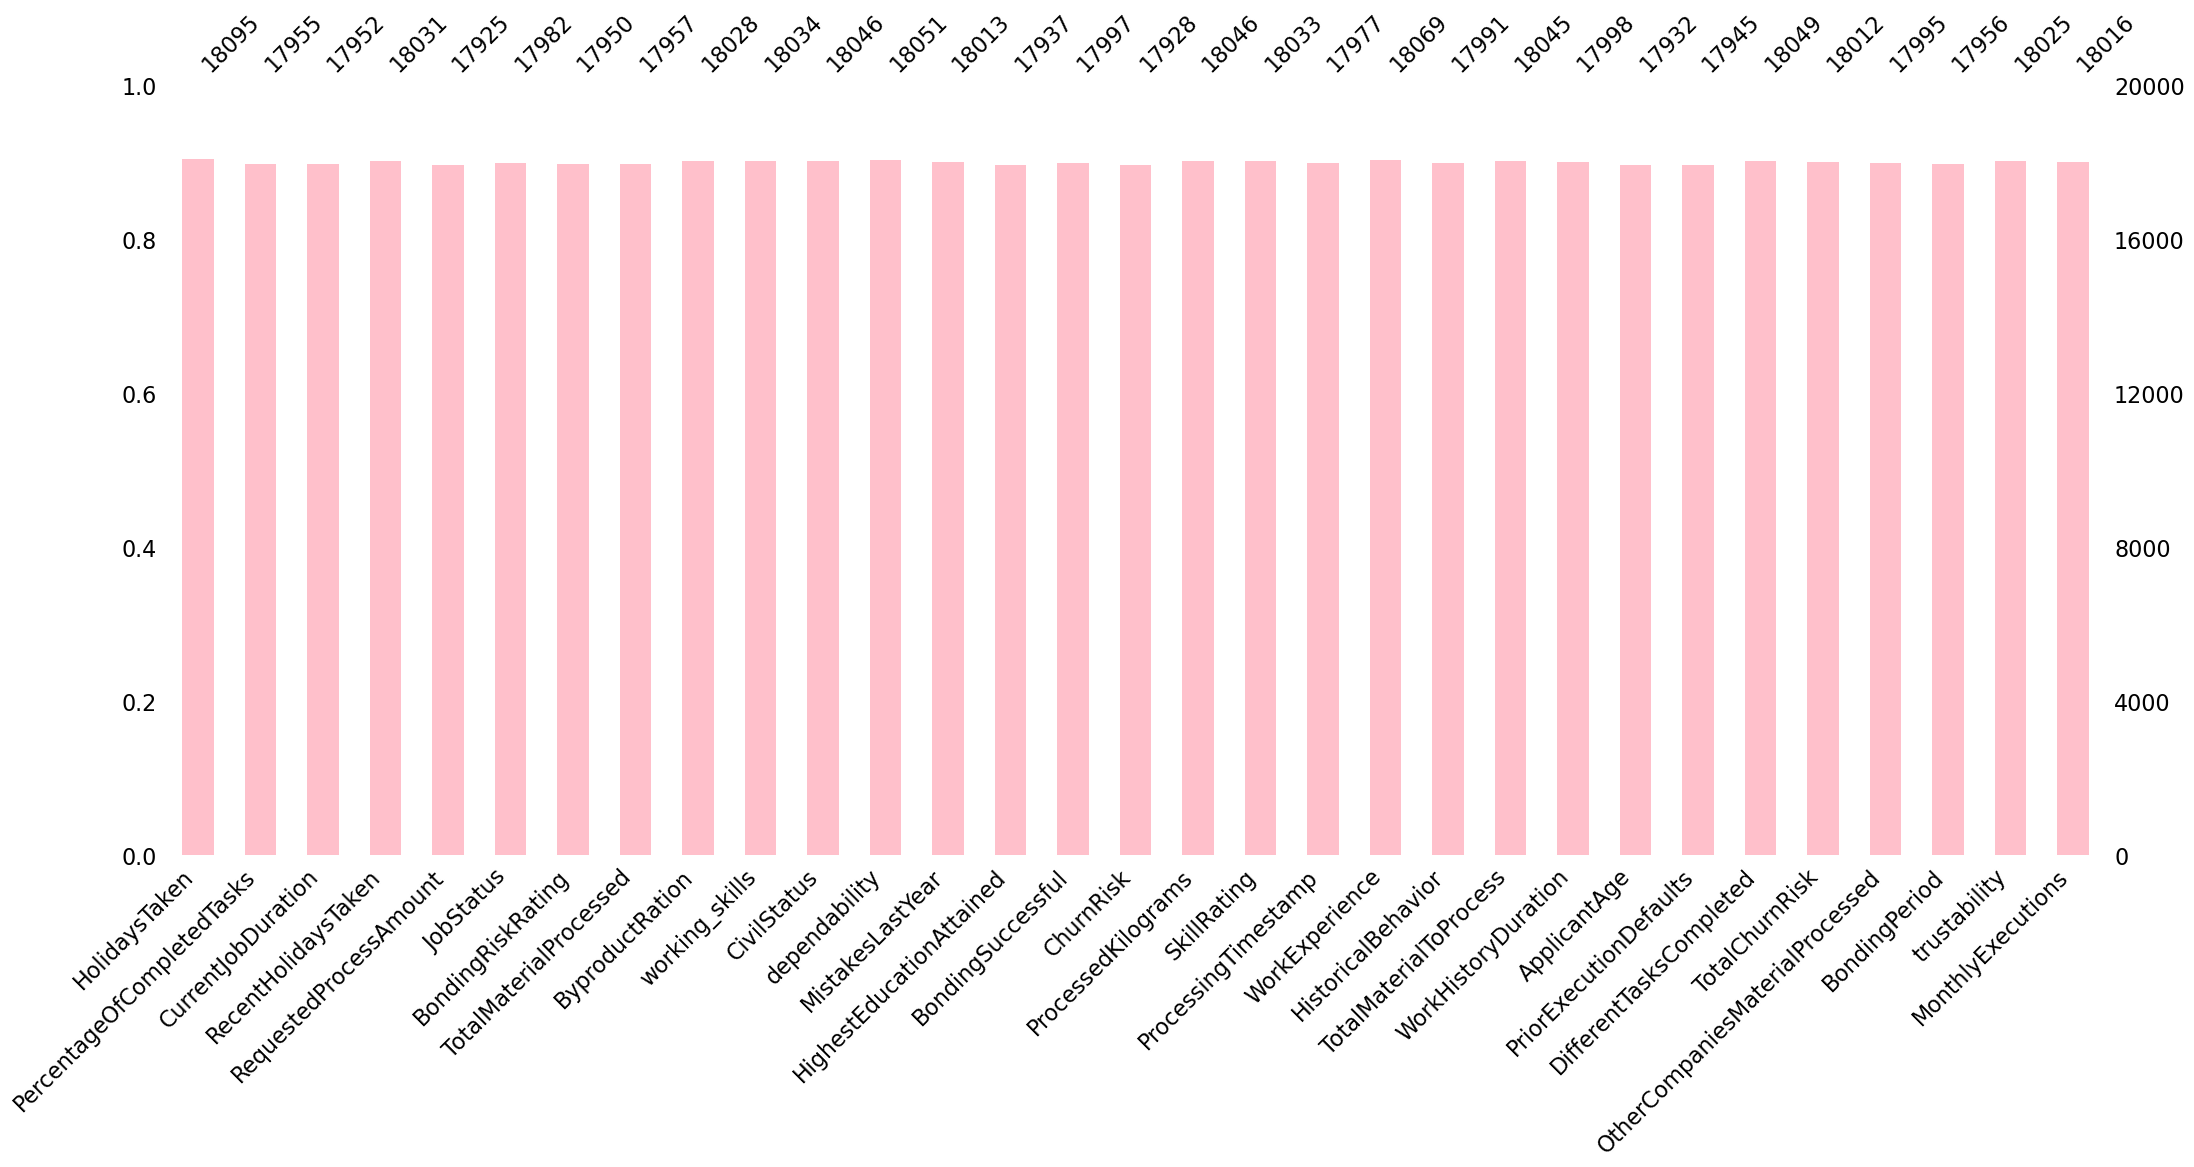

In [299]:
msno.bar(aerogel_bonding_df, color='pink' ,labels=True) 

In [300]:
missing_rows = aerogel_bonding_df.isna().sum(axis=1)
print(missing_rows.value_counts())

#Counts the frequency of each unique number of missing columns
#4735 rows has 3 missing values

3     4735
2     4357
4     3672
1     2584
5     2235
6     1021
0      790
7      399
8      143
9       43
10      17
11       4
dtype: int64


Distribution of Missing Values per row plotted:

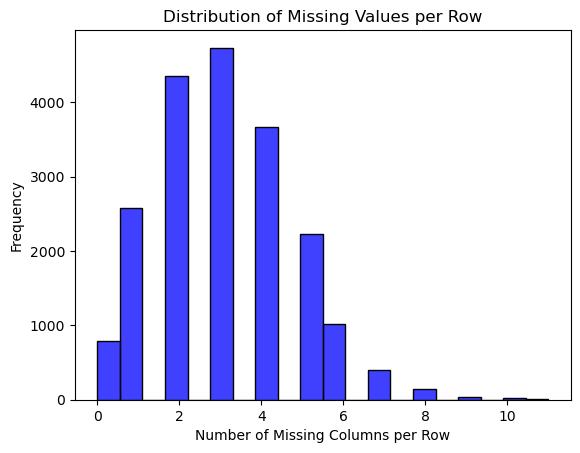

In [301]:
missing_rows_count = aerogel_bonding_df.isna().sum(axis=1)
sns.histplot(missing_rows_count, kde=False, bins=20, color='blue')
plt.title('Distribution of Missing Values per Row')
plt.xlabel('Number of Missing Columns per Row')
plt.ylabel('Frequency')
plt.show()

Implementing a function to construct missing values table

In [302]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


missing_values_table(aerogel_bonding_df) #to see the number of missing values in each column

Your selected dataframe has 31 columns.
There are 31 columns that have missing values.


,Missing Values,% of Total Values
RequestedProcessAmount,2075,10.4
ChurnRisk,2072,10.4
ApplicantAge,2068,10.3
HighestEducationAttained,2063,10.3
PriorExecutionDefaults,2055,10.3
BondingRiskRating,2050,10.2
CurrentJobDuration,2048,10.2
PercentageOfCompletedTasks,2045,10.2
BondingPeriod,2044,10.2
TotalMaterialProcessed,2043,10.2


# Handling missing data:

We used different approaches to handle missing data for numeric, non-numeric and binary valued columns:

First, we identified the non-numeric columns: 

In [303]:
# filters the DataFrame to include only non-numeric columns and outputs list of non-numeric column names 
non_numeric_columns = aerogel_bonding_df.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric cloumns:",non_numeric_columns)

Non-numeric cloumns: ['JobStatus', 'CivilStatus', 'HighestEducationAttained', 'ProcessingTimestamp']


Handles missing values in non-numeric columns

In [304]:
# fills missing values in non-numeric columns with the mode
non_numeric_columns = aerogel_bonding_df.select_dtypes(exclude=['number']).columns
for column in non_numeric_columns:
    aerogel_bonding_df[column] = aerogel_bonding_df[column].fillna(aerogel_bonding_df[column].mode()[0])

# shows the updated DataFrame NaN value table
nan_count_after = aerogel_bonding_df.isna().sum() #counts the NaN values(1); false (0) otherwise

# displays the count of NaN values for each column
print("NaN count in each column:")
print(nan_count_after)

NaN count in each column:
HolidaysTaken                      1905
PercentageOfCompletedTasks         2045
CurrentJobDuration                 2048
RecentHolidaysTaken                1969
RequestedProcessAmount             2075
JobStatus                             0
BondingRiskRating                  2050
TotalMaterialProcessed             2043
ByproductRation                    1972
working_skills                     1966
CivilStatus                           0
dependability                      1949
MistakesLastYear                   1987
HighestEducationAttained              0
BondingSuccessful                  2003
ChurnRisk                          2072
ProcessedKilograms                 1954
SkillRating                        1967
ProcessingTimestamp                   0
WorkExperience                     1931
HistoricalBehavior                 2009
TotalMaterialToProcess             1955
WorkHistoryDuration                2002
ApplicantAge                       2068
PriorExecution

Identifying binary cloumns:

In [305]:
# filters the DataFrame to include only binary columns(i.e., columns that contain only 0.0 and 1.0) and outputs list of binary column names
binary_columns = []

for column in aerogel_bonding_df.select_dtypes(include=['number']).columns:
    if set(aerogel_bonding_df[column].dropna().unique()) == {0.0, 1.0} or set(aerogel_bonding_df[column].dropna().unique()) == {0, 1}:
        binary_columns.append(column)
        
print("Binary cloumns:",binary_columns)

Binary cloumns: ['MistakesLastYear', 'BondingSuccessful', 'PriorExecutionDefaults']


Handles missing values in binary columns

In [306]:
for column in binary_columns:
    mode_value = aerogel_bonding_df[column].mode()[0]
    aerogel_bonding_df[column] = aerogel_bonding_df[column].fillna(mode_value)

# shows the updated DataFrame NaN value table
nan_count_after = aerogel_bonding_df.isna().sum() #counts the NaN values(1); false (0) otherwise

# displays the count of NaN values for each column
print("NaN count in each column:")
print(nan_count_after)

NaN count in each column:
HolidaysTaken                      1905
PercentageOfCompletedTasks         2045
CurrentJobDuration                 2048
RecentHolidaysTaken                1969
RequestedProcessAmount             2075
JobStatus                             0
BondingRiskRating                  2050
TotalMaterialProcessed             2043
ByproductRation                    1972
working_skills                     1966
CivilStatus                           0
dependability                      1949
MistakesLastYear                      0
HighestEducationAttained              0
BondingSuccessful                     0
ChurnRisk                          2072
ProcessedKilograms                 1954
SkillRating                        1967
ProcessingTimestamp                   0
WorkExperience                     1931
HistoricalBehavior                 2009
TotalMaterialToProcess             1955
WorkHistoryDuration                2002
ApplicantAge                       2068
PriorExecution

Identifying numeric cloumns:

In [307]:
# filters the DataFrame to include only numeric columns and outputs list of numeric column names 
numeric_columns = aerogel_bonding_df.select_dtypes(include=['number']).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in binary_columns]
print("Numeric columns:",numeric_columns)

Numeric columns: ['HolidaysTaken', 'PercentageOfCompletedTasks', 'CurrentJobDuration', 'RecentHolidaysTaken', 'RequestedProcessAmount', 'BondingRiskRating', 'TotalMaterialProcessed', 'ByproductRation', 'working_skills', 'dependability', 'ChurnRisk', 'ProcessedKilograms', 'SkillRating', 'WorkExperience', 'HistoricalBehavior', 'TotalMaterialToProcess', 'WorkHistoryDuration', 'ApplicantAge', 'DifferentTasksCompleted', 'TotalChurnRisk', 'OtherCompaniesMaterialProcessed', 'BondingPeriod', 'trustability', 'MonthlyExecutions']


Handles missing values in numeric columns

In [308]:
# fills missing values in numeric columns with the mean
numeric_columns = aerogel_bonding_df.select_dtypes(include=['number']).columns
aerogel_bonding_df[numeric_columns] = aerogel_bonding_df[numeric_columns].fillna(aerogel_bonding_df[numeric_columns].mean())

# shows the updated DataFrame NaN value table
nan_count_after = aerogel_bonding_df.isna().sum() #counts the NaN values(1); false (0) otherwise

# displays the count of NaN values for each column
print("NaN count in each column:")
print(nan_count_after)

NaN count in each column:
HolidaysTaken                      0
PercentageOfCompletedTasks         0
CurrentJobDuration                 0
RecentHolidaysTaken                0
RequestedProcessAmount             0
JobStatus                          0
BondingRiskRating                  0
TotalMaterialProcessed             0
ByproductRation                    0
working_skills                     0
CivilStatus                        0
dependability                      0
MistakesLastYear                   0
HighestEducationAttained           0
BondingSuccessful                  0
ChurnRisk                          0
ProcessedKilograms                 0
SkillRating                        0
ProcessingTimestamp                0
WorkExperience                     0
HistoricalBehavior                 0
TotalMaterialToProcess             0
WorkHistoryDuration                0
ApplicantAge                       0
PriorExecutionDefaults             0
DifferentTasksCompleted            0
TotalChurnRi

Heatmap and Pairplot plotting to see the correlation between the variables, and choose the right variables to include in train/test data

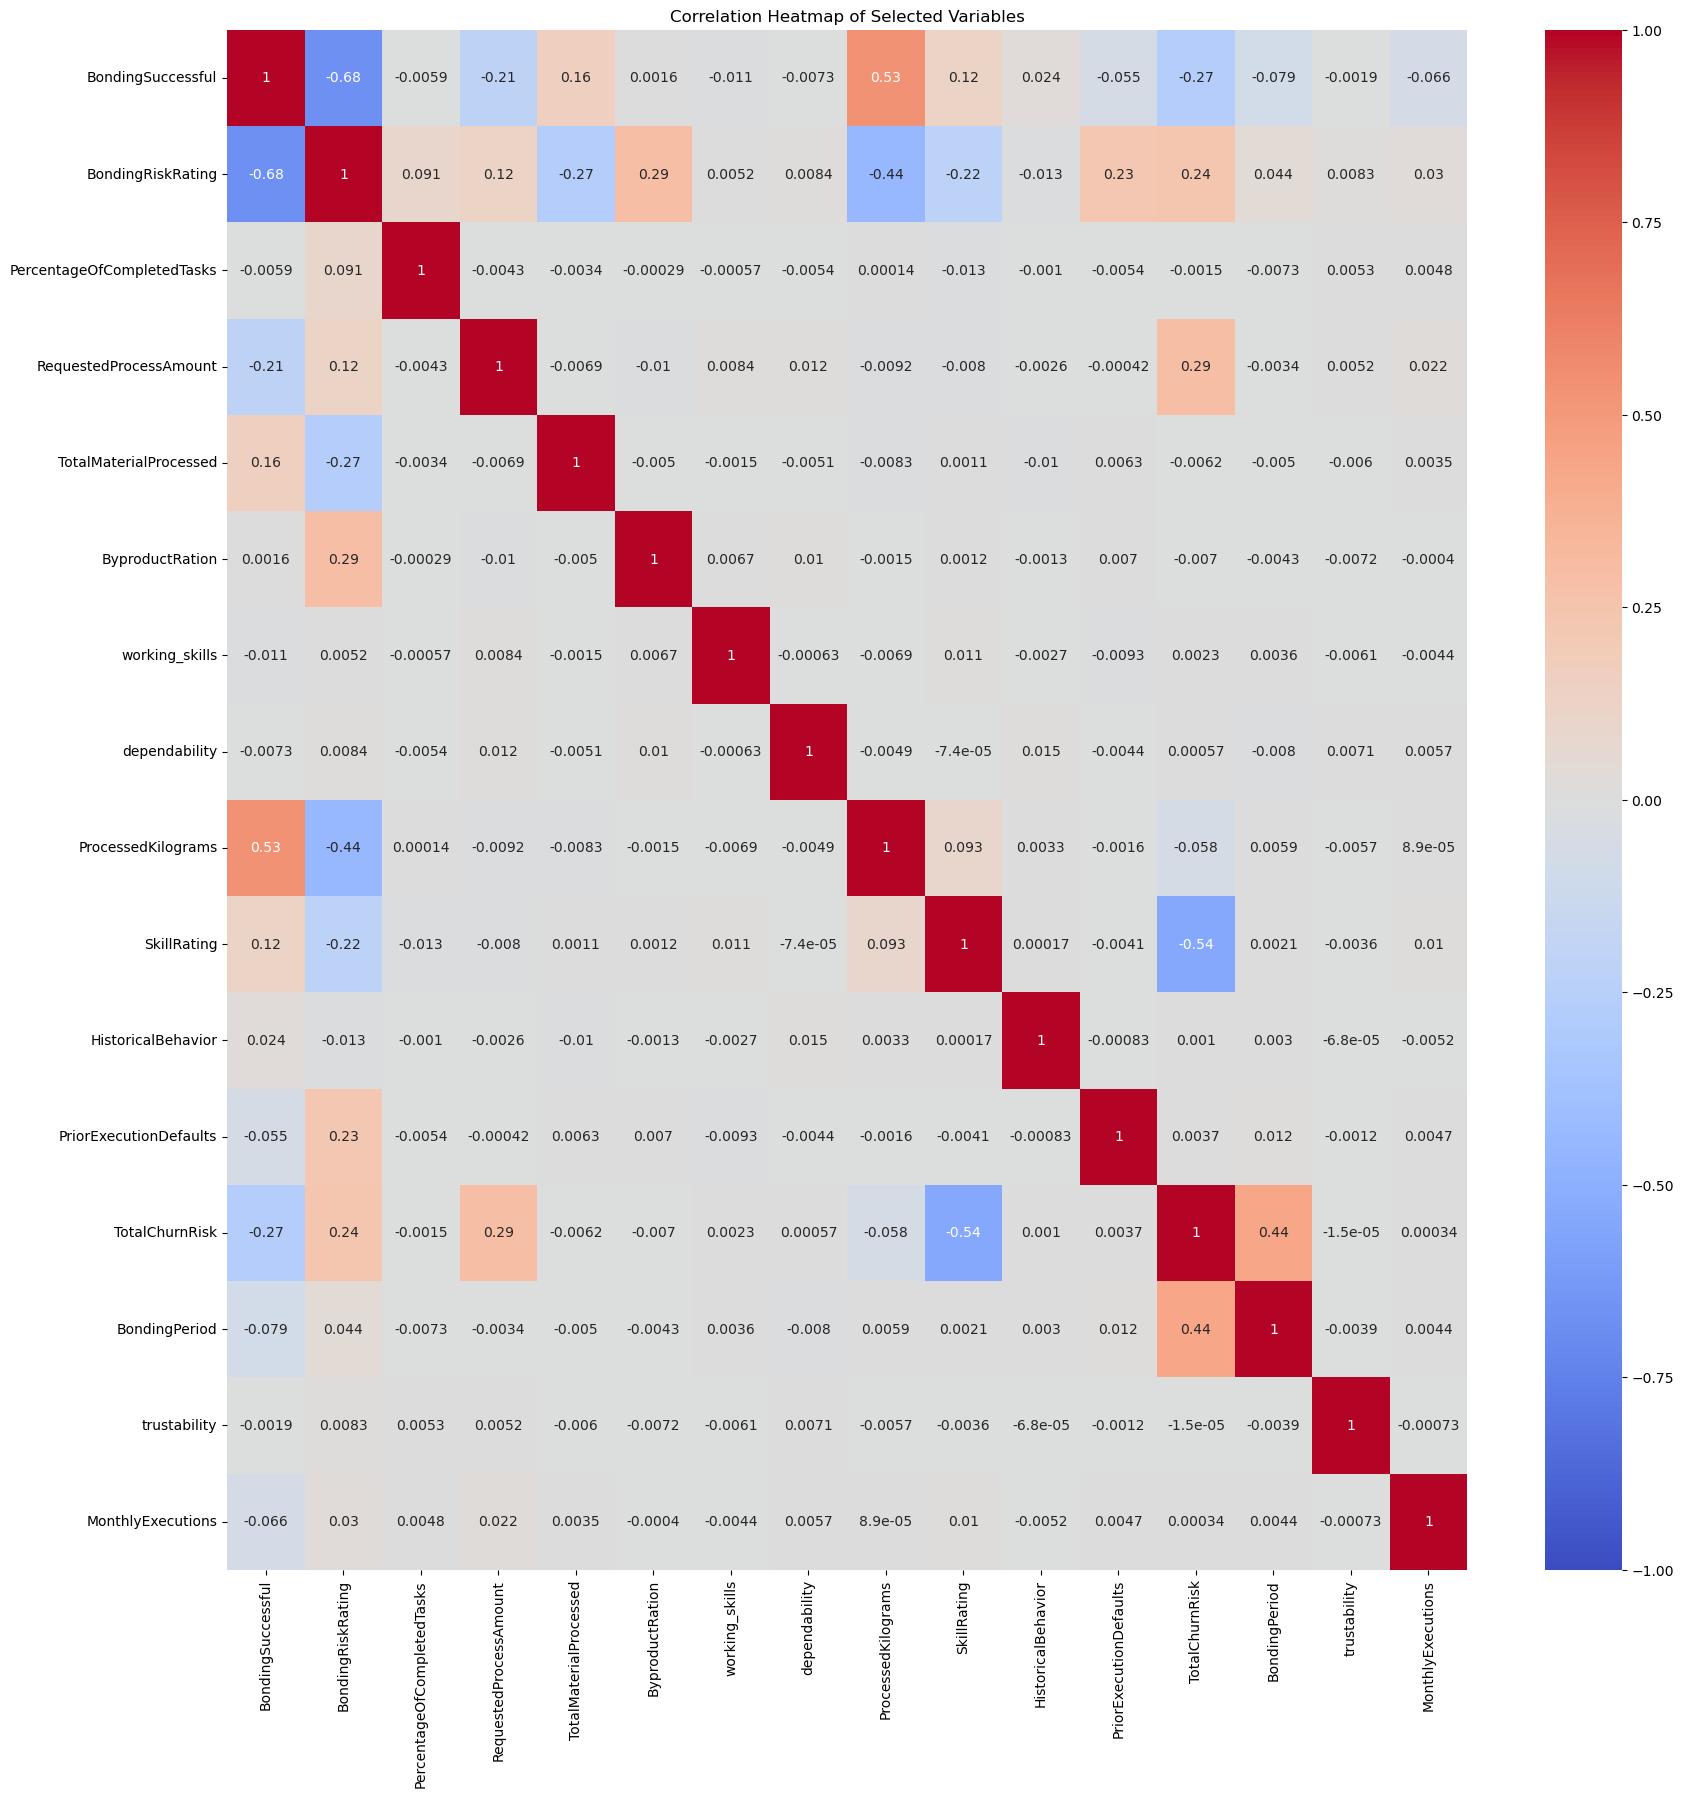

In [309]:
# Selecting the relevant columns for the heatmap
columns_for_heatmap = [
    'BondingSuccessful', 'BondingRiskRating', 'PercentageOfCompletedTasks', 
    'RequestedProcessAmount', 'TotalMaterialProcessed', 'ByproductRation', 
    'working_skills', 'dependability', 'ProcessedKilograms', 'SkillRating', 
    'HistoricalBehavior', 'PriorExecutionDefaults', 'TotalChurnRisk', 
    'BondingPeriod', 'trustability', 'MonthlyExecutions'
]

# Filter the DataFrame to include only the selected columns
aerogel_bonding_df_updt = aerogel_bonding_df[columns_for_heatmap]

# Compute the correlation matrix
correlation_matrix = aerogel_bonding_df_updt.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Selected Variables")
plt.show()


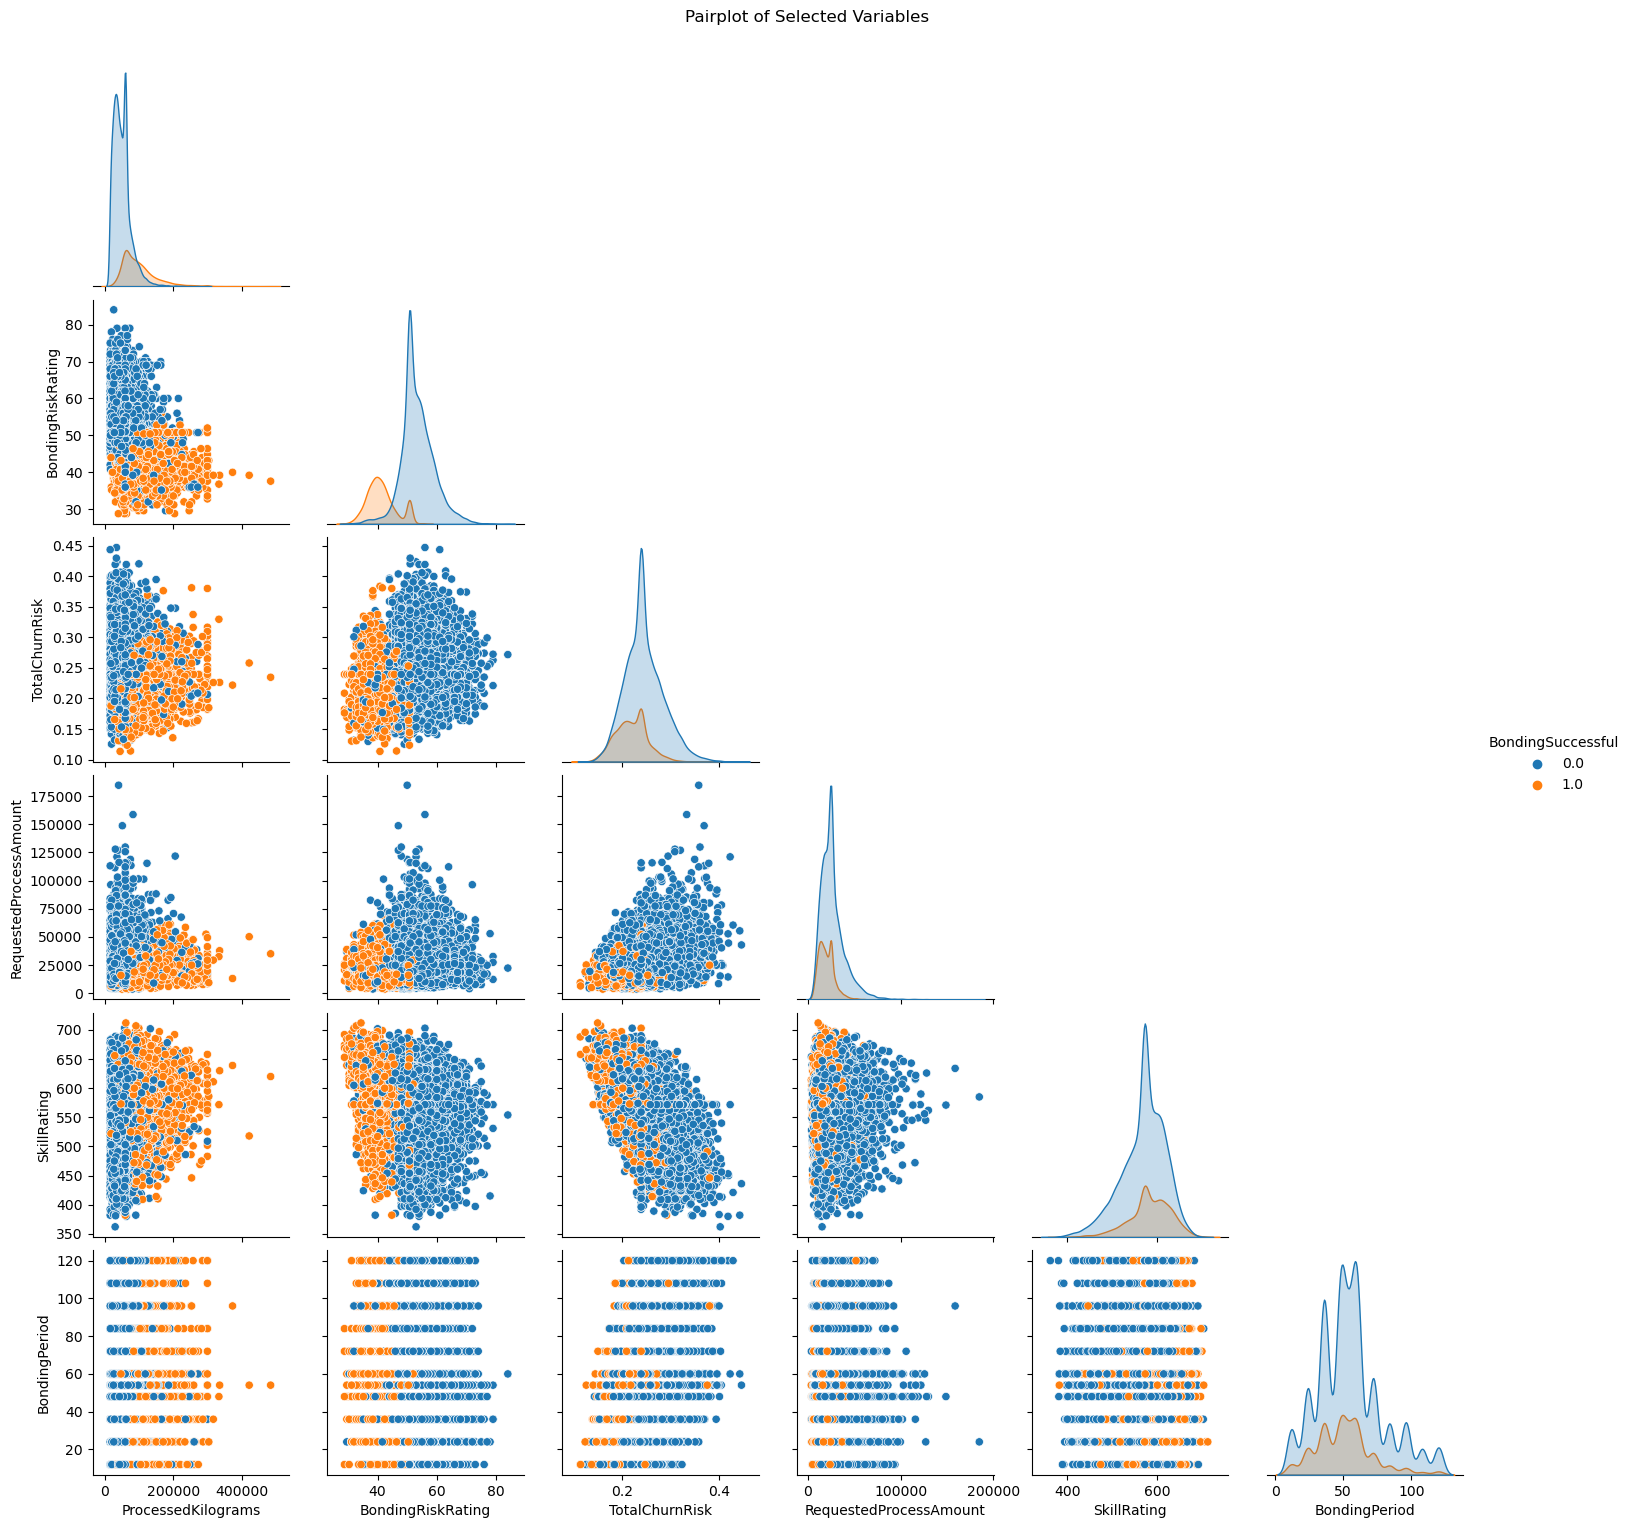

In [310]:
# Select the relevant columns for the pairplot
columns_for_pairplot = [
    'BondingSuccessful',
    'ProcessedKilograms',
    'BondingRiskRating',
    'TotalChurnRisk',
    'RequestedProcessAmount',
    'SkillRating',
    'BondingPeriod',
]

# Filter the DataFrame to include only the selected columns
df_selected = aerogel_bonding_df[columns_for_pairplot]

# Create the pairplot
sns.pairplot(df_selected, hue='BondingSuccessful', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Variables", y=1.02)  # Add a title
plt.show()


Splitting the data into training and testing

In [311]:
from sklearn.model_selection import train_test_split

# Identify the target variable
target = 'BondingSuccessful'

# Select features (exclude target and irrelevant columns like 'ProcessingTimestamp')
features = [
    'ProcessedKilograms', # high positive correlation coefficient 0.53
    'BondingRiskRating', # high negative correlation coefficient -0.68
    'TotalChurnRisk', # moderate negative correlation coefficient -0.27
    'RequestedProcessAmount', # low negative correlation coefficient of -0.21
    'SkillRating', # low positive correlation coefficient 0.13 we keep this one for comparison purposes
    'BondingPeriod', # very low negative correlation of -0.097
]

# Filters the dataset to include only the selected features and the target
X = aerogel_bonding_df[features]
y = aerogel_bonding_df[target]

# Splits the data into training (70%) and testing (30%) sets, because our dataset is large(10,000+ samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Training set size: 14000
Testing set size: 6000
X_train shape: (14000, 6), y_train shape: (14000,)
X_test shape: (6000, 6), y_test shape: (6000,)


In [312]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Print the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Ratio: {original_counts[1] / (original_counts[0] + original_counts[1])}")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Ratio: {train_counts[1] / (train_counts[0] + train_counts[1])}")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Ratio: {test_counts[1] / (test_counts[0] + test_counts[1])}")

Distribution of y (Original Dataset):
Class 0.0: 15693 samples
Class 1.0: 4307 samples
Ratio: 0.21535

Distribution of y_train (Training Set):
Class 0.0: 11012 samples
Class 1.0: 2988 samples
Ratio: 0.21342857142857144

Distribution of y_test (Test Set):
Class 0.0: 4681 samples
Class 1.0: 1319 samples
Ratio: 0.21983333333333333


In [313]:
# Perform a stratified split to maintain target variable distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shapes of the split datasets:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Shapes of the split datasets:
X_train shape: (16000, 6), y_train shape: (16000,)
X_test shape: (4000, 6), y_test shape: (4000,)


In [314]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Print the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Ratio: {original_counts[1] / (original_counts[0] + original_counts[1])}")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Ratio: {train_counts[1] / (train_counts[0] + train_counts[1])}")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Ratio: {test_counts[1] / (test_counts[0] + test_counts[1])}")

Distribution of y (Original Dataset):
Class 0.0: 15693 samples
Class 1.0: 4307 samples
Ratio: 0.21535

Distribution of y_train (Training Set):
Class 0.0: 12554 samples
Class 1.0: 3446 samples
Ratio: 0.215375

Distribution of y_test (Test Set):
Class 0.0: 3139 samples
Class 1.0: 861 samples
Ratio: 0.21525


In [315]:
from sklearn.preprocessing import MinMaxScaler 


selected_columns = [
     'ProcessedKilograms',
    'BondingRiskRating',
    'TotalChurnRisk',
    'RequestedProcessAmount',
    'SkillRating',
    'BondingPeriod',
] 

# Separate training and testing sets
# Assume X_train, X_test, y_train, y_test are already defined from your prior split.

# Scale numerical columns using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_columns])  # Apply MinMax scaling to train set
X_test_scaled = scaler.transform(X_test[selected_columns])  # Apply the same scaling to the test set

# Outputs
print("Preprocessed Training Set Shape:", X_train_scaled.shape)
print("Preprocessed Testing Set Shape:", X_test_scaled.shape)

Preprocessed Training Set Shape: (16000, 6)
Preprocessed Testing Set Shape: (4000, 6)


Models chosen are executed here: 

In [316]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# First we initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=50)

# Then we train the model using the training data
rf_model.fit(X_train, y_train)

# After that we predict the target variable on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) #return the accuracy score first
print(f"Accuracy: {accuracy:.4f}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) #we utilize the classification report function

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9487

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      3139
         1.0       0.86      0.91      0.88       861

    accuracy                           0.95      4000
   macro avg       0.92      0.93      0.93      4000
weighted avg       0.95      0.95      0.95      4000


Confusion Matrix:
[[3014  125]
 [  80  781]]


In [317]:
#Logistic Regression: 								                                                         
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=50, max_iter=200) #using imported LogisticRegression function

# Train the model using the training data
logreg_model.fit(X_train, y_train) #Trains the logistic regression model on the training data 

# Predict the target variable on the test data
y_pred = logreg_model.predict(X_test) #Uses the trained model to make predictions on the testing data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Adding other relevant evaluation metrics
print("\nClassification Report:") # finally, using the report
print(classification_report(y_test, y_pred))
# Implementing the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9207

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      3139
         1.0       0.85      0.77      0.81       861

    accuracy                           0.92      4000
   macro avg       0.89      0.87      0.88      4000
weighted avg       0.92      0.92      0.92      4000


Confusion Matrix:
[[3017  122]
 [ 195  666]]


In [318]:
#ANN: 											                                                        
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# First we scale the data using MinMaxScaler.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # We use our training data
X_test_scaled = scaler.transform(X_test) # We use our test data

# Now we initialize the ANN model with parameters as listed:
ann_model = MLPClassifier(
    hidden_layer_sizes=(100,), # We tested different layer sizes and 100 is one of the fastest and most accurate size.
    activation='relu', # We use ReLU for hidden layers
    max_iter=200, # We can use 200 as iteration number for optimization 
    random_state=50,  # higher accuracy 
    batch_size=64, # lower batch size significantly improved our speed
    learning_rate_init=0.1, # Lower learning rate proved higher accuracy during our fine tuning.
    early_stopping=True, # for speed 
    validation_fraction=0.1 # prevents overfitting
)

# Training the model using the training data
ann_model.fit(X_train_scaled, y_train)

# Predicting target variable on the test data
y_pred = ann_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Adding other evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Implementing confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9455

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      3139
         1.0       0.86      0.89      0.88       861

    accuracy                           0.95      4000
   macro avg       0.92      0.93      0.92      4000
weighted avg       0.95      0.95      0.95      4000


Confusion Matrix:
[[3014  125]
 [  93  768]]
